In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
TOTAL_SUPPLY = 120_000_000
MIN_STAKED = 1

STAKED = np.linspace(MIN_STAKED, TOTAL_SUPPLY, 1000)

### current nominal yield

- ignore MEV, just talking about inflation here
- "sticker price" yield for staking

$
\text{yield} = \frac{2.6 \cdot 64}{\sqrt{\text{stake}}}
$

In [57]:
y = 2.6 * 64 / np.sqrt(STAKED)

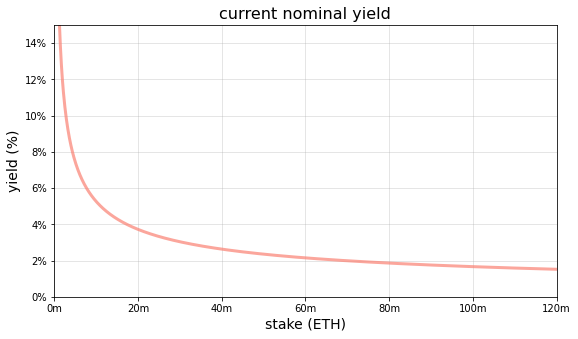

In [58]:
f, ax = plt.subplots(figsize=(9,5))
ax.plot(STAKED, y, color='salmon', linewidth=3, alpha=0.7)

ax.set_xlim(0,120_000_000)
xticks = np.arange(0, 120_000_001, 20_000_000)
ax.set_xticks(xticks)
ax.set_xticklabels(["{:d}m".format(int(tick/1_000_000)) for tick in xticks])
ax.set_xlabel("stake (ETH)", size=14)

ax.set_ylim(0,0.15)
ax.set_yticks([0, 0.02,0.04,0.06,0.08,0.1, 0.12, 0.14])
ax.set_yticklabels(["0%", "2%", "4%", "6%", "8%", "10%", "12%", "14%"])
ax.set_ylabel("yield (%)", size=14)

ax.grid(alpha=0.4)
ax.set_title("current nominal yield", size=16)

plt.show()

### current inflation

- the supply is increasing b/c the yield is new ETH
- show inflation rate as a function of ETH staked

$
\text{inflation} = \text{stake} \cdot \text{yield}
$

In [61]:
inflation = STAKED * y

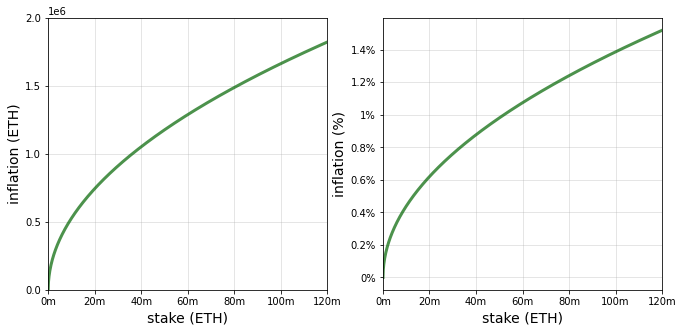

In [62]:
f, axarr = plt.subplots(ncols=2, figsize=(11,5))

ax = axarr[0]
ax.plot(STAKED, inflation, color='darkgreen', linewidth=3, alpha=0.7)

ax.set_ylim(0,2_000_000)
yticks = np.arange(0, 2_000_001, 500_000)
ax.set_yticks(yticks)
ax.set_ylabel("inflation (ETH)", size=14)

ax = axarr[1]
ax.plot(STAKED, inflation/TOTAL_SUPPLY, color='darkgreen', linewidth=3, alpha=0.7)
ax.set_yticks([0, 0.002,0.004,0.006,0.008,0.01, 0.012, 0.014])
ax.set_yticklabels(["0%", "0.2%", "0.4%", "0.6%", "0.8%", "1%", "1.2%", "1.4%"])
ax.set_ylabel("inflation (%)", size=14)

for ax in axarr:    
    ax.set_xlim(0,120_000_000)
    xticks = np.arange(0, 120_000_001, 20_000_000)
    ax.set_xticks(xticks)
    ax.set_xticklabels(["{:d}m".format(int(tick/1_000_000)) for tick in xticks])
    ax.set_xlabel("stake (ETH)", size=14)
    ax.grid(alpha=0.4)


plt.show()

### current real yield

- nominal yield - inflation

$
\text{real yield} = \text{yield} - \text{inflation}
$

In [66]:
y[0], inflation[0]

(166.4, 166.4)

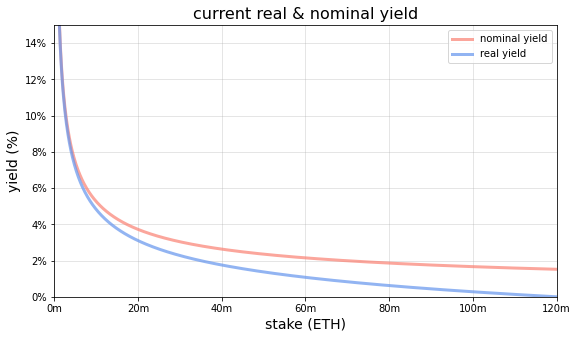

In [70]:
f, ax = plt.subplots(figsize=(9,5))
ax.plot(STAKED, y, color='salmon', linewidth=3, alpha=0.7, label='nominal yield')
ax.plot(STAKED, y-inflation/TOTAL_SUPPLY, color='cornflowerblue', linewidth=3, alpha=0.7, label='real yield')

ax.set_xlim(0,120_000_000)
xticks = np.arange(0, 120_000_001, 20_000_000)
ax.set_xticks(xticks)
ax.set_xticklabels(["{:d}m".format(int(tick/1_000_000)) for tick in xticks])
ax.set_xlabel("stake (ETH)", size=14)

ax.set_ylim(0,0.15)
ax.set_yticks([0, 0.02,0.04,0.06,0.08,0.1, 0.12, 0.14])
ax.set_yticklabels(["0%", "2%", "4%", "6%", "8%", "10%", "12%", "14%"])
ax.set_ylabel("yield (%)", size=14)

ax.grid(alpha=0.4)
ax.set_title("current real & nominal yield", size=16)
ax.legend()

plt.show()

In [73]:
def getYields(amt):
    ny = 2.6 * 64 / np.sqrt(amt)
    inf = ny * amt / TOTAL_SUPPLY
    ry = ny - inf
    return ny, ry 

In [74]:
# 30mm staked ETH (25%)
getYields(30_000_000)

(0.030380344522953212, 0.02278525839221491)

In [75]:
# 90mm staked ETH (75%)
getYields(90_000_000)

(0.017540100088400613, 0.004385025022100152)

### hyptothetical nominal yield

- ignore MEV, just talking about inflation here
- "sticker price" yield for staking

$
\text{yield} = \frac{2.6 \cdot 64}{\sqrt{\text{stake}} \left(1+2^{-25} \cdot \text{stake}\right)}
$

In [77]:
h_y = 2.6 * 64 / (np.sqrt(STAKED)*(1+2**(-25)*STAKED))

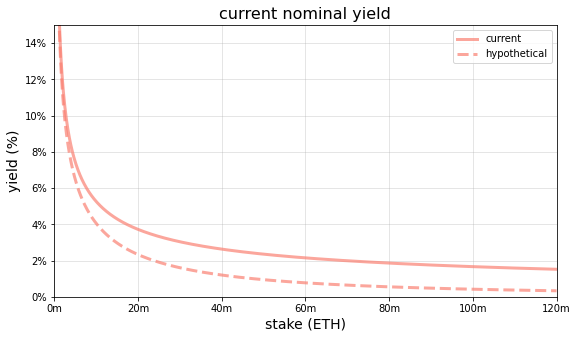

In [80]:
f, ax = plt.subplots(figsize=(9,5))
ax.plot(STAKED, y, color='salmon', linewidth=3, alpha=0.7, label='current')
ax.plot(STAKED, h_y, color='salmon', linewidth=3, alpha=0.7, linestyle='dashed', label='hypothetical')

ax.set_xlim(0,120_000_000)
xticks = np.arange(0, 120_000_001, 20_000_000)
ax.set_xticks(xticks)
ax.set_xticklabels(["{:d}m".format(int(tick/1_000_000)) for tick in xticks])
ax.set_xlabel("stake (ETH)", size=14)

ax.set_ylim(0,0.15)
ax.set_yticks([0, 0.02,0.04,0.06,0.08,0.1, 0.12, 0.14])
ax.set_yticklabels(["0%", "2%", "4%", "6%", "8%", "10%", "12%", "14%"])
ax.set_ylabel("yield (%)", size=14)

ax.grid(alpha=0.4)
ax.set_title("current nominal yield", size=16)
ax.legend()

plt.show()

### hypothetical inflation

- the supply is increasing b/c the yield is new ETH
- show inflation rate as a function of ETH staked

$
\text{inflation} = \text{stake} \cdot \text{yield}
$

In [81]:
h_inflation = STAKED * h_y

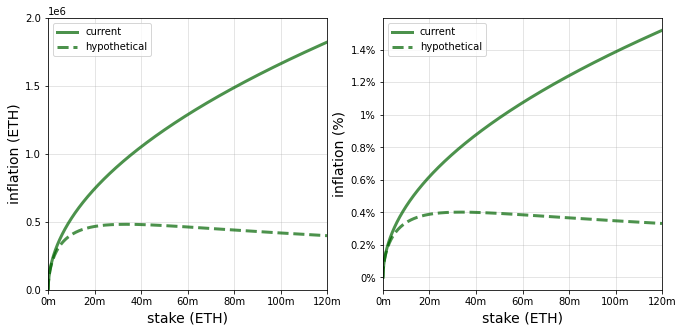

In [84]:
f, axarr = plt.subplots(ncols=2, figsize=(11,5))

ax = axarr[0]
ax.plot(STAKED, inflation, color='darkgreen', linewidth=3, alpha=0.7, label='current')
ax.plot(STAKED, h_inflation, color='darkgreen', linewidth=3, alpha=0.7, label='hypothetical', linestyle='dashed')

ax.set_ylim(0,2_000_000)
yticks = np.arange(0, 2_000_001, 500_000)
ax.set_yticks(yticks)
ax.set_ylabel("inflation (ETH)", size=14)

ax = axarr[1]
ax.plot(STAKED, inflation/TOTAL_SUPPLY, color='darkgreen', linewidth=3, alpha=0.7, label='current')
ax.plot(STAKED, h_inflation/TOTAL_SUPPLY, color='darkgreen', linewidth=3, alpha=0.7, label='hypothetical', linestyle='dashed')
ax.set_yticks([0, 0.002,0.004,0.006,0.008,0.01, 0.012, 0.014])
ax.set_yticklabels(["0%", "0.2%", "0.4%", "0.6%", "0.8%", "1%", "1.2%", "1.4%"])
ax.set_ylabel("inflation (%)", size=14)

for ax in axarr:    
    ax.set_xlim(0,120_000_000)
    xticks = np.arange(0, 120_000_001, 20_000_000)
    ax.set_xticks(xticks)
    ax.set_xticklabels(["{:d}m".format(int(tick/1_000_000)) for tick in xticks])
    ax.set_xlabel("stake (ETH)", size=14)
    ax.grid(alpha=0.4)
    ax.legend()


plt.show()

### hypothetical real yield

- nominal yield - inflation

$
\text{real yield} = \text{yield} - \text{inflation}
$

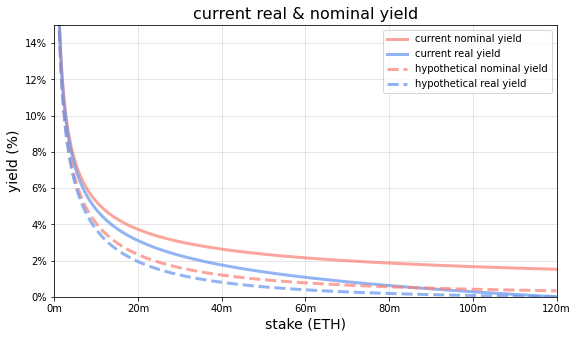

In [85]:
f, ax = plt.subplots(figsize=(9,5))
ax.plot(STAKED, y, color='salmon', linewidth=3, alpha=0.7, label='current nominal yield')
ax.plot(STAKED, y-inflation/TOTAL_SUPPLY, color='cornflowerblue', linewidth=3, alpha=0.7, label='current real yield')

ax.plot(STAKED, h_y, color='salmon', linewidth=3, alpha=0.7, label='hypothetical nominal yield', linestyle='dashed')
ax.plot(STAKED, h_y-h_inflation/TOTAL_SUPPLY, color='cornflowerblue', linewidth=3, alpha=0.7, label='hypothetical real yield', linestyle='dashed')


ax.set_xlim(0,120_000_000)
xticks = np.arange(0, 120_000_001, 20_000_000)
ax.set_xticks(xticks)
ax.set_xticklabels(["{:d}m".format(int(tick/1_000_000)) for tick in xticks])
ax.set_xlabel("stake (ETH)", size=14)

ax.set_ylim(0,0.15)
ax.set_yticks([0, 0.02,0.04,0.06,0.08,0.1, 0.12, 0.14])
ax.set_yticklabels(["0%", "2%", "4%", "6%", "8%", "10%", "12%", "14%"])
ax.set_ylabel("yield (%)", size=14)

ax.grid(alpha=0.4)
ax.set_title("current real & nominal yield", size=16)
ax.legend()

plt.show()

In [91]:
def getYields(amt):
    ny = 2.6 * 64 / np.sqrt(amt)
    inf = ny * amt / TOTAL_SUPPLY
    ry = ny - inf
    print("nominal yield {:.2f}%, real yield {:.2f}%".format(ny * 100, ry * 100))

In [92]:
# 30mm staked ETH (25%)
getYields(30_000_000)

nominal yield 3.04%, real yield 2.28%


In [93]:
# 90mm staked ETH (75%)
getYields(90_000_000)

nominal yield 1.75%, real yield 0.44%


In [94]:
def getYields(amt):
    ny = 2.6 * 64 / (np.sqrt(amt)*(1+2**(-25)*amt))
    inf = ny * amt / TOTAL_SUPPLY
    ry = ny - inf
    print("nominal yield {:.2f}%, real yield {:.2f}%".format(ny * 100, ry * 100))

In [95]:
# 30mm staked ETH (25%)
getYields(30_000_000)

nominal yield 1.60%, real yield 1.20%


In [96]:
# 90mm staked ETH (75%)
getYields(90_000_000)

nominal yield 0.48%, real yield 0.12%


In [ ]:
CURRENT_STAKE = 30_000_000 # 25% of the supply